In [ ]:
pip install numpy pandas matplotlib seaborn scikit-learn

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, f1_score
import matplotlib.pyplot as plt

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/pip-datasets/WSSVRiskFactor_rev.csv')
data.head()

SlNo  FarmerAge   FarmerEduaction  InvolveWithShrimpFarming   Latitude  \
0     1         50           Primary                        18  22.801215   
1     2         64  Junior Secondary                        20  22.840350   
2     3         25  Junior Secondary                        18  22.823490   
3     4         37         Secondary                        18  22.823569   
4     5         22           Primary                         4  22.597399   

   Longitude      Zone  PriorLandUse  Area_ha  SoilType  ...  FootBath  \
0  89.550397    Khulna             3     0.18         1  ...         0   
1  89.752238    Khulna             3     0.15         2  ...         0   
2  89.672769    Khulna             3     0.81         2  ...         0   
3  89.672605    Khulna             3     0.40         2  ...         0   
4  89.739075  Bagerhat             3     2.32         2  ...         0   

   LimitedAccess  SameEquipmentForWholeCultureArea  CulturePractice  \
0              0                                 1                2   
1              0                                 1                2   
2              0                                 1                2   
3              0                                 1                2   
4              0                                 1                2   

   Temperature   pH  Salinity  PreviousPrevalence(%)  CurrentPrevalance(%)  \
0         28.0  8.0       9.0                     70                     0   
1          NaN  NaN       NaN                     20                     0   
2          NaN  NaN       NaN                     75                    15   
3          NaN  NaN       2.0                     15                    20   
4         24.0  7.5      11.0                     15                    45   

   VirusDetected  
0              0  
1              0  
2              1  
3              1  
4              1  

[5 rows x 48 columns]

In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/pip-datasets/WSSVRiskFactor_rev.csv'
data = pd.read_csv(file_path)

column_to_delete = ['FarmerEduaction','Latitude', 'Longitude', 'SlNo', 'InletOutlet', 'Operator', 'FeedType', 'PLQuality', 'Aerator', 'PriorLandUse', 'BirdScare', 'ChemicalUseWaterTreatment', 'ChemicalUsePondPreparation', 'WaterComingViaOtherFarms', 'WaterSource_IndirectNatural', 'CrabFench', 'FootBath', 'SludgeRemovalInterval', 'CulturePractice', 'LimitedAccess', 'CultureMethod', 'Reservoir', 'PeriodOfFallow', 'FarmerAge', 'WaterSource_DirectNatural']
data = data.drop(column_to_delete, axis=1)

output_file_path = '/content/drive/MyDrive/pip-datasets/WSSVRiskFactor_rev1.csv'
data.to_csv(output_file_path, index=False)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/pip-datasets/WSSVRiskFactor_rev1.csv')
data.head()

InvolveWithShrimpFarming      Zone  Area_ha  SoilType  CanalDepth_ft  \
0                        18    Khulna     0.18         1            7.0   
1                        20    Khulna     0.15         2            7.0   
2                        18    Khulna     0.81         2            6.0   
3                        18    Khulna     0.40         2            6.0   
4                         4  Bagerhat     2.32         2            6.0   

   GherDepth_ft  FertilizerUse  GherDryAfterHarvest  SludgeRemovalMethods  \
0           5.0              1                    1                     3   
1           3.0              3                    1                     2   
2           4.0              4                    1                     2   
3           4.0              4                    1                     2   
4           2.5              4                    1                     1   

   MaintainAndRepairDikes  ...  StockingAge_Days  CropRotation  FeedAdditives  \
0                       2  ...                15             0              1   
1                       2  ...                 7             1              1   
2                       2  ...                 8             1              0   
3                       2  ...                 5             1              0   
4                       1  ...                30             1              1   

   SameEquipmentForWholeCultureArea  Temperature   pH  Salinity  \
0                                 1         28.0  8.0       9.0   
1                                 1          NaN  NaN       NaN   
2                                 1          NaN  NaN       NaN   
3                                 1          NaN  NaN       2.0   
4                                 1         24.0  7.5      11.0   

   PreviousPrevalence(%)  CurrentPrevalance(%)  VirusDetected  
0                     70                     0              0  
1                     20                     0              0  
2                     75                    15              1  
3                     15                    20              1  
4                     15                    45              1  

[5 rows x 23 columns]

In [ ]:
# Handle null values
numerical_columns = data.select_dtypes(include=['float64']).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

data.head()

InvolveWithShrimpFarming      Zone  Area_ha  SoilType  CanalDepth_ft  \
0                        18    Khulna     0.18         1            7.0   
1                        20    Khulna     0.15         2            7.0   
2                        18    Khulna     0.81         2            6.0   
3                        18    Khulna     0.40         2            6.0   
4                         4  Bagerhat     2.32         2            6.0   

   GherDepth_ft  FertilizerUse  GherDryAfterHarvest  SludgeRemovalMethods  \
0           5.0              1                    1                     3   
1           3.0              3                    1                     2   
2           4.0              4                    1                     2   
3           4.0              4                    1                     2   
4           2.5              4                    1                     1   

   MaintainAndRepairDikes  ...  StockingAge_Days  CropRotation  FeedAdditives  \
0                       2  ...                15             0              1   
1                       2  ...                 7             1              1   
2                       2  ...                 8             1              0   
3                       2  ...                 5             1              0   
4                       1  ...                30             1              1   

   SameEquipmentForWholeCultureArea  Temperature        pH   Salinity  \
0                                 1     28.00000  8.000000   9.000000   
1                                 1     29.70122  7.723214  11.303012   
2                                 1     29.70122  7.723214  11.303012   
3                                 1     29.70122  7.723214   2.000000   
4                                 1     24.00000  7.500000  11.000000   

   PreviousPrevalence(%)  CurrentPrevalance(%)  VirusDetected  
0                     70                     0              0  
1                     20                     0              0  
2                     75                    15              1  
3                     15                    20              1  
4                     15                    45              1  

[5 rows x 23 columns]

In [ ]:
# Split features and target
X = data.drop('VirusDetected', axis=1)
y = data['VirusDetected']

# List of categorical columns
categorical_cols = ['Zone']

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')  # 'drop' removes one level to avoid multicollinearity

# Encode categorical columns and concatenate with remaining numerical columns
X_encoded = encoder.fit_transform(X[categorical_cols])
encoded_cols = encoder.get_feature_names_out(categorical_cols)
X_encoded = pd.DataFrame(X_encoded, columns=encoded_cols, index=X.index)

# Concatenate encoded categorical columns with the remaining numerical columns
X_final = pd.concat([X.drop(categorical_cols, axis=1), X_encoded], axis=1)

# Display the encoded dataset
print(X_final)
print(y)


     InvolveWithShrimpFarming  Area_ha  SoilType  CanalDepth_ft  GherDepth_ft  \
0                          18     0.18         1            7.0           5.0   
1                          20     0.15         2            7.0           3.0   
2                          18     0.81         2            6.0           4.0   
3                          18     0.40         2            6.0           4.0   
4                           4     2.32         2            6.0           2.5   
..                        ...      ...       ...            ...           ...   
228                         1     2.83         1            0.0           4.5   
229                         5     0.87         1            0.0           5.0   
230                        12     0.20         2            5.0           1.5   
231                         2    40.49         3            0.0           5.5   
232                        10     0.81         3            4.0           2.5   

     FertilizerUse  GherDry

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # 'drop' removes one level to avoid multicollinearity


In [ ]:

# List of categorical columns
categorical_cols = ['Zone']  # Replace with your categorical column names

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # 'drop' removes one level to avoid multicollinearity

# Encode categorical columns and concatenate with remaining numerical columns
X_encoded = encoder.fit_transform(X[categorical_cols])
encoded_cols = encoder.get_feature_names_out(categorical_cols)
X_encoded = pd.DataFrame(X_encoded, columns=encoded_cols, index=X.index)

# Concatenate encoded categorical columns with the remaining numerical columns
X_final = pd.concat([X.drop(categorical_cols, axis=1), X_encoded], axis=1)

Data Summary:
   InvolveWithShrimpFarming      Zone  Area_ha  SoilType  CanalDepth_ft  \
0                        18    Khulna     0.18         1            7.0   
1                        20    Khulna     0.15         2            7.0   
2                        18    Khulna     0.81         2            6.0   
3                        18    Khulna     0.40         2            6.0   
4                         4  Bagerhat     2.32         2            6.0   

   GherDepth_ft  FertilizerUse  GherDryAfterHarvest  SludgeRemovalMethods  \
0           5.0              1                    1                     3   
1           3.0              3                    1                     2   
2           4.0              4                    1                     2   
3           4.0              4                    1                     2   
4           2.5              4                    1                     1   

   MaintainAndRepairDikes  ...  StockingAge_Days  CropRotation  FeedAddi

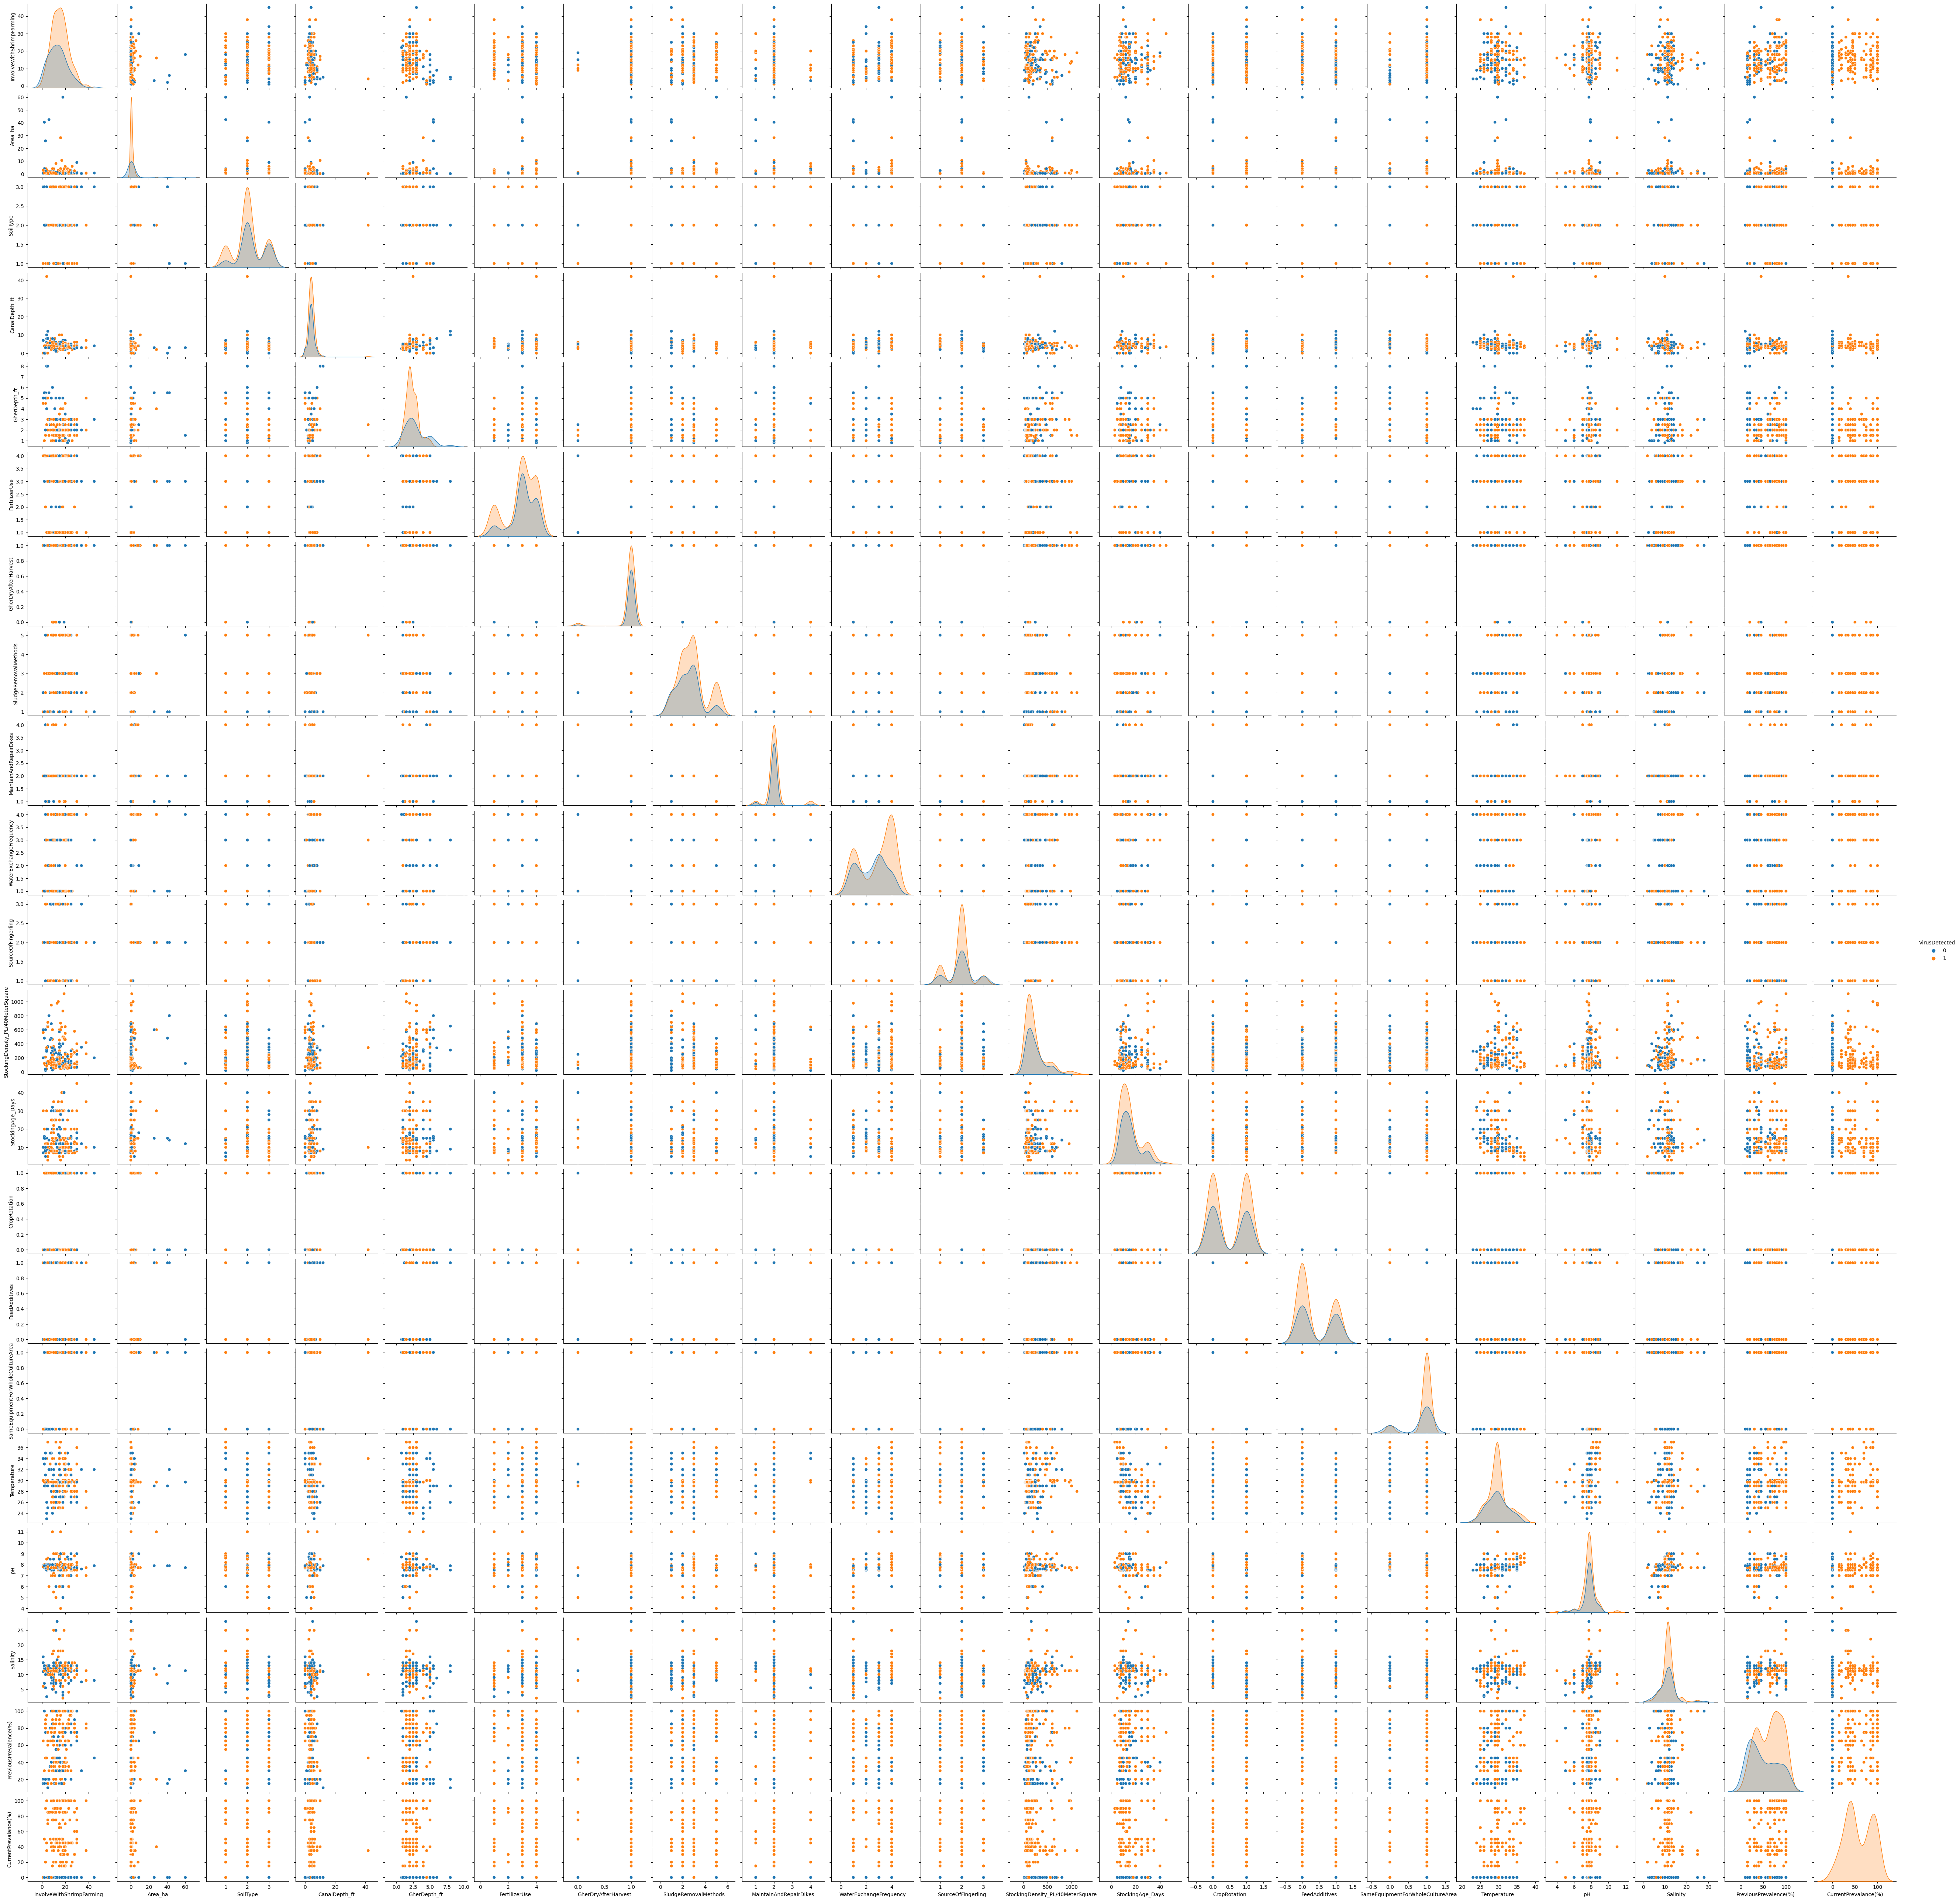

<ipython-input-10-1443031ff5a4>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


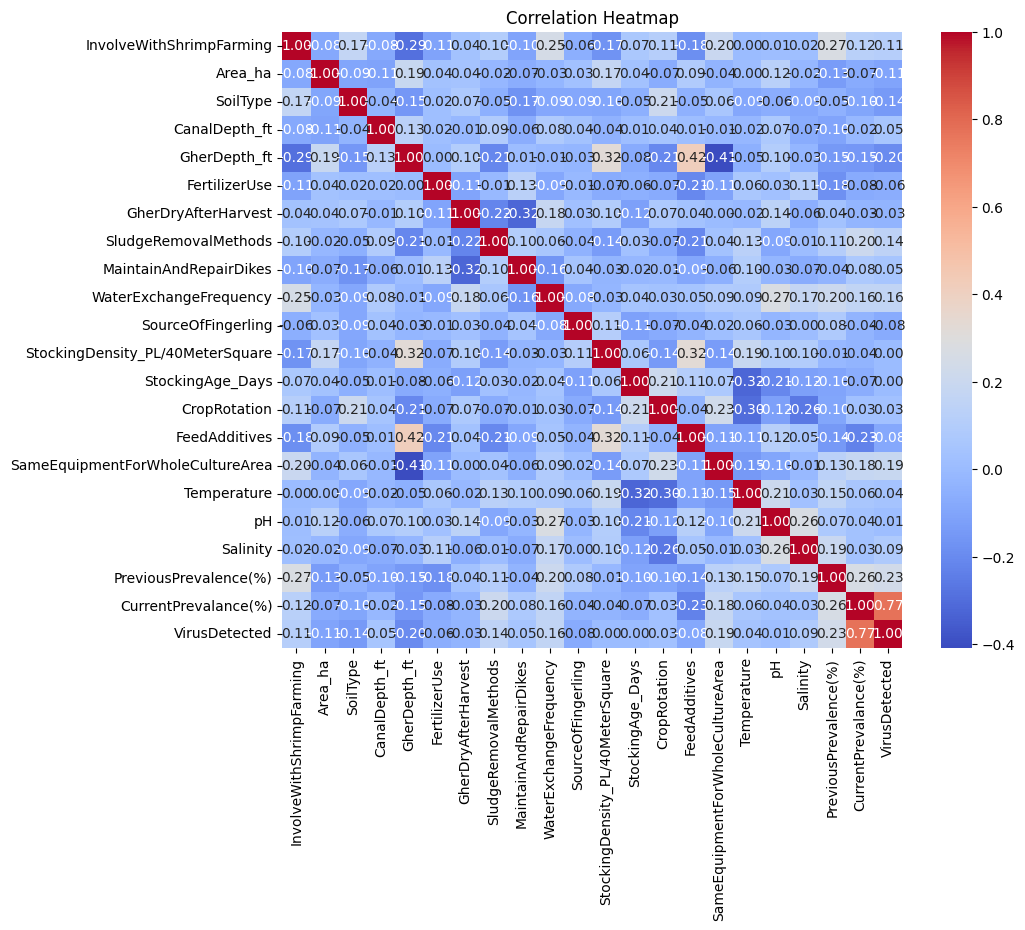

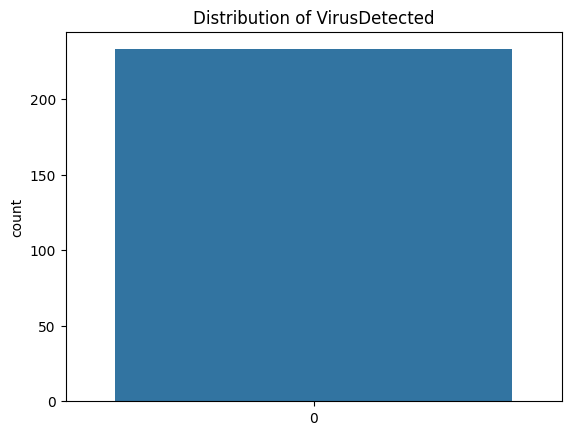

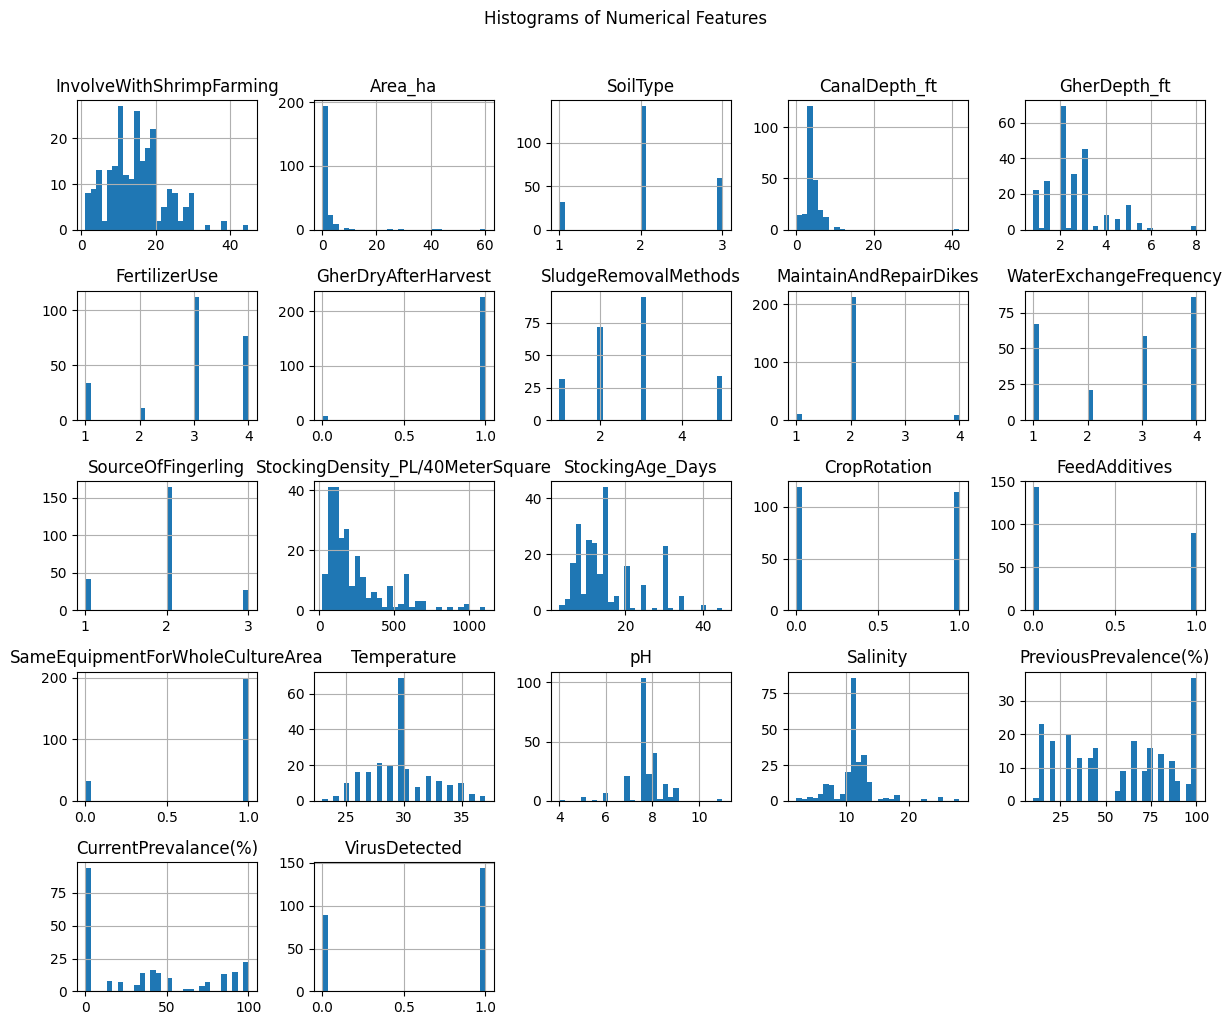

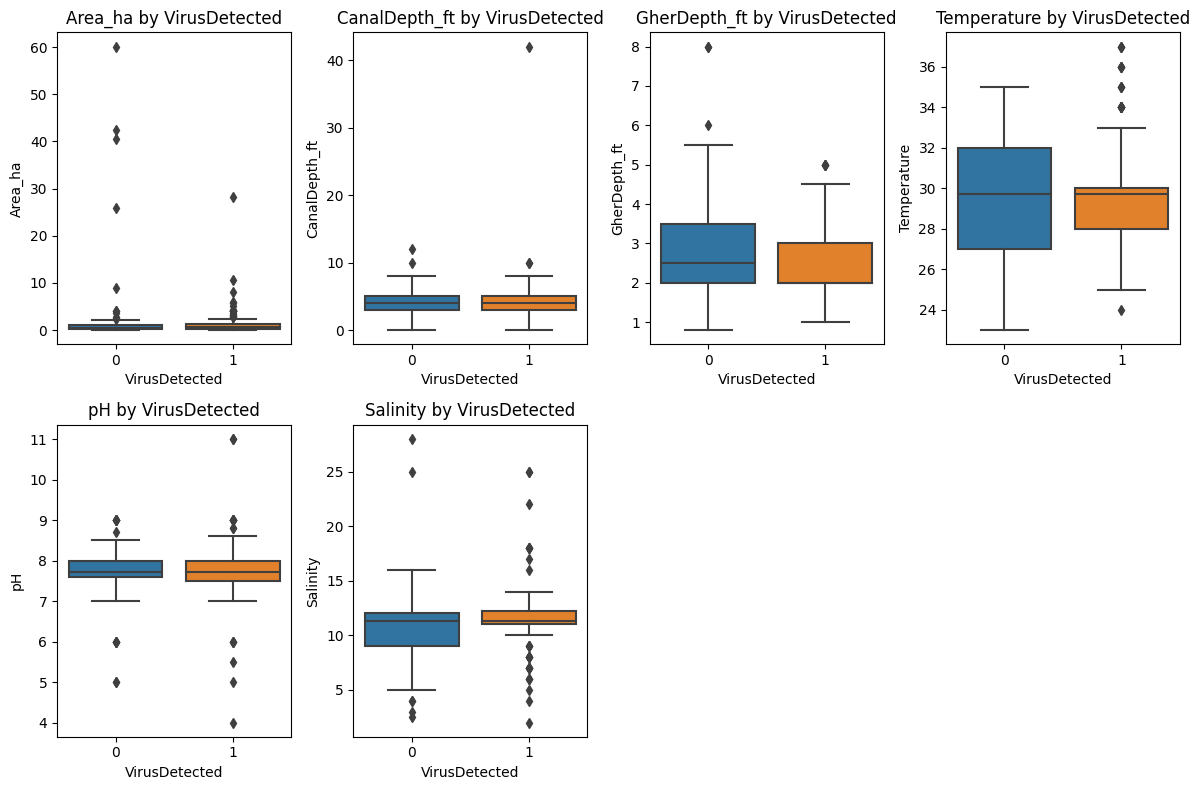

In [ ]:
# Data Summary
print("Data Summary:")
print(data.head())
print("\nData Info:")
print(data.info())
print("\nData Statistics:")
print(data.describe())

# Data Visualization and EDA
# Pairplot for visualizing relationships between features
sns.pairplot(data, hue='VirusDetected', diag_kind='kde')
plt.show()

# Correlation Heatmap
corr = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Distribution of the target variable 'VirusDetected'
sns.countplot(data['VirusDetected'])
plt.title('Distribution of VirusDetected')
plt.show()

# Histograms of numerical features
data.hist(figsize=(12, 10), bins=30)
plt.suptitle("Histograms of Numerical Features", y=1.02)
plt.tight_layout()
plt.show()

# Boxplots for numerical features by VirusDetected
numerical_features = data.select_dtypes(include=['float64']).columns
num_features_count = len(numerical_features)
num_subplots = min(num_features_count, 8)  # Adjusted to ensure maximum 8 subplots

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x='VirusDetected', y=feature, data=data)
    plt.title(f'{feature} by VirusDetected')
    if i == num_subplots:  # Break loop after 8 subplots
        break

plt.tight_layout()
plt.show()


In [ ]:
# Calculate the IQR for each numerical feature
Q1 = data[numerical_features].quantile(0.25)
Q3 = data[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the dataset
outlier_removed_data = data[~((data[numerical_features] < lower_bound) | (data[numerical_features] > upper_bound)).any(axis=1)]

# Display the shape before and after removing outliers
print("Shape before removing outliers:", data.shape)
print("Shape after removing outliers:", outlier_removed_data.shape)


Shape before removing outliers: (233, 23)
Shape after removing outliers: (143, 23)


In [ ]:
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Initialize the random forest classifier
rf_classifier = RandomForestClassifier()

# Train the model
rf_classifier.fit(X_train, y_train)


RandomForestClassifier()

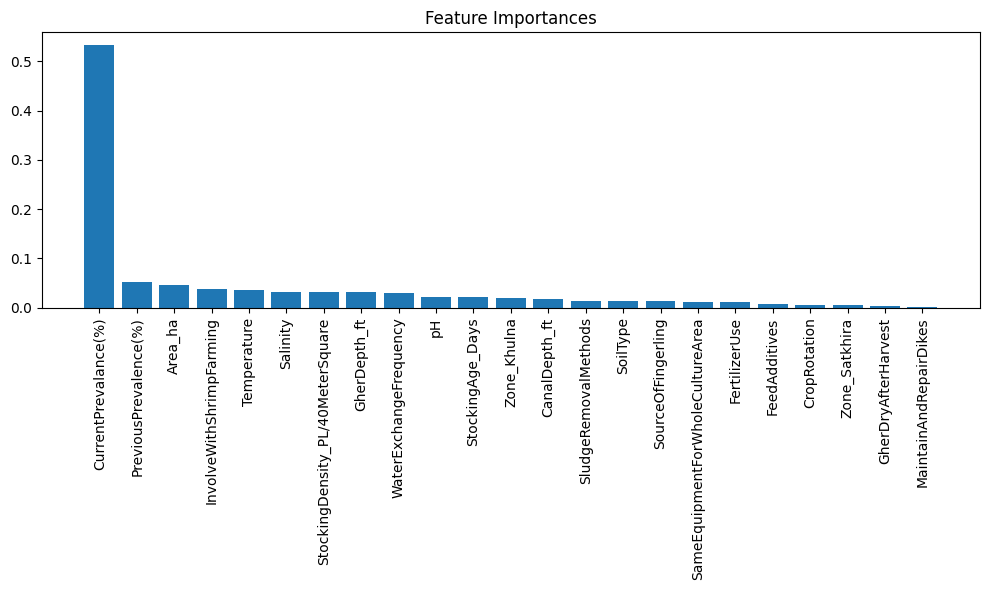

In [ ]:
# Calculate feature importance
importances = rf_classifier.feature_importances_
feature_names = X_train.columns  # Use the columns from X_train

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()


Cross-Validation Scores: [1.         1.         0.95744681 1.         0.93478261]
Mean Cross-Validation Score: 0.978445883441258


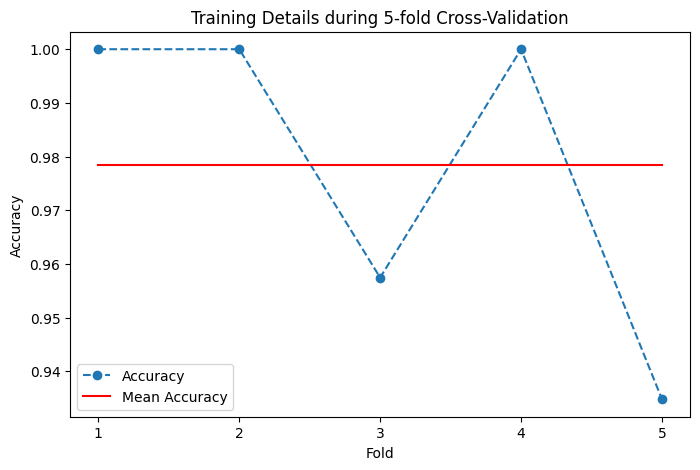

In [ ]:
# Model training with 5-fold cross-validation
cv_scores = cross_val_score(rf_classifier, X_final, y, cv=5, scoring='accuracy')
cv_predictions = cross_val_predict(rf_classifier, X_final, y, cv=5)

# Calculate mean cross-validation score
mean_cv_score = np.mean(cv_scores)

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", mean_cv_score)

# Plot training details
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='--', label='Accuracy')
plt.plot(range(1, 6), [mean_cv_score] * 5, color='r', linestyle='-', label='Mean Accuracy')
plt.xticks(range(1, 6))
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Training Details during 5-fold Cross-Validation')
plt.legend()
plt.show()




Accuracy: 0.9787234042553191
Precision: 1.0
Recall: 0.96875
F1-score: 0.9841269841269841
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.97      0.98        32

    accuracy                           0.98        47
   macro avg       0.97      0.98      0.98        47
weighted avg       0.98      0.98      0.98        47



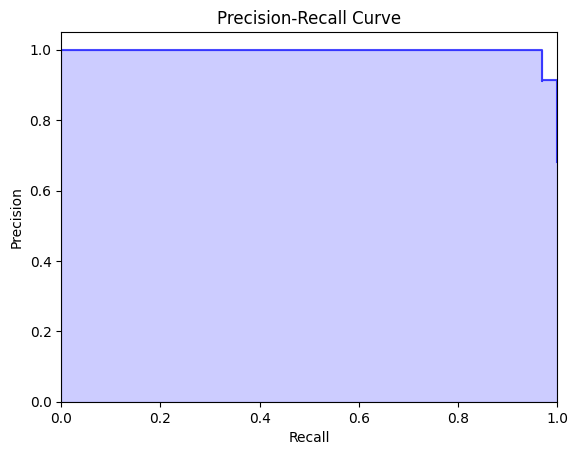

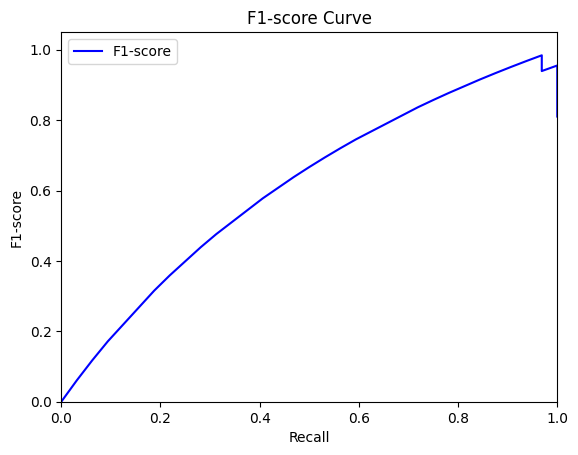

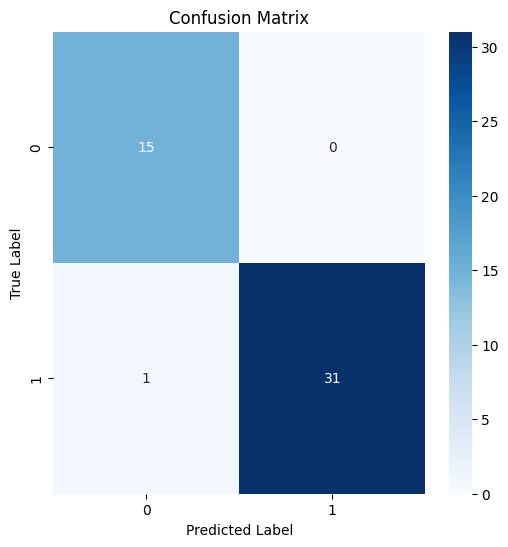

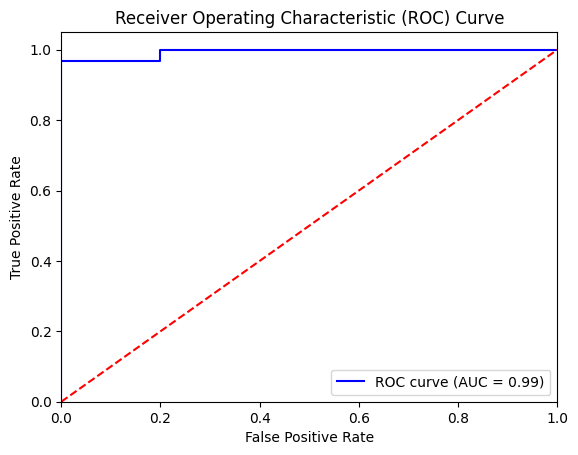

In [ ]:
# Model testing and evaluation
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate and print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)



# Plot Precision-Recall curve
y_pred_probs = rf_classifier.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)

plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Plot F1-score curve
f1_values = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()


# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Calculate ROC curve and AUC
y_pred_probs = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Initialize the logistic regression classifier with tuned hyperparameters
logreg_classifier = LogisticRegression(max_iter=1000, C=0.01, solver='lbfgs')


# Train the model
logreg_classifier.fit(X_train_scaled, y_train)


LogisticRegression(C=0.01, max_iter=1000)

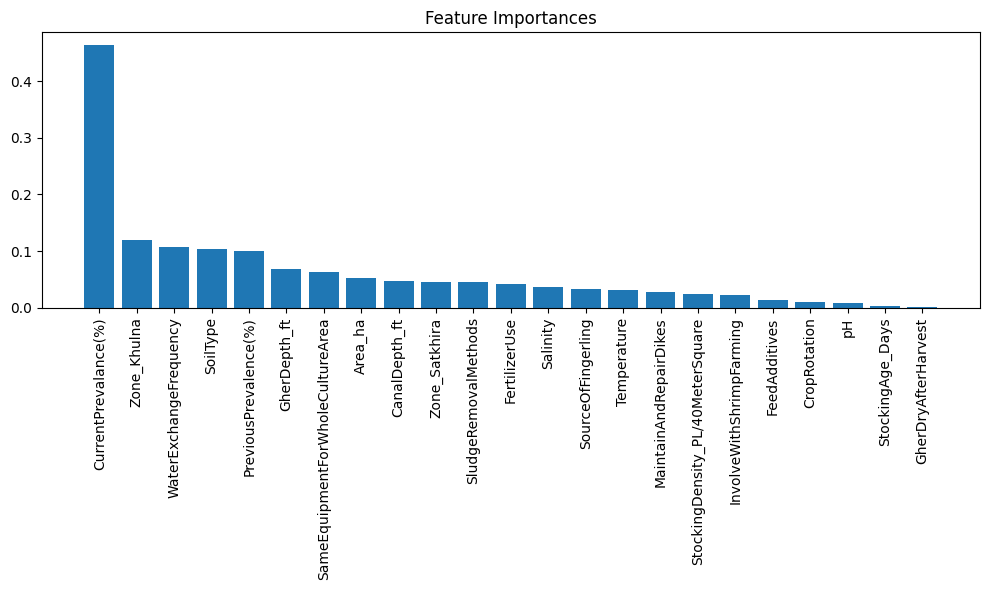

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already trained and fitted the logistic regression model (logreg_classifier) on your data
coefficients = logreg_classifier.coef_[0]
feature_names = X_train.columns

# Sort coefficients in descending order
indices = np.argsort(np.abs(coefficients))[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), np.abs(coefficients)[indices], align="center")
plt.xticks(range(X_train.shape[1]), np.array(feature_names)[indices], rotation=90)
plt.tight_layout()
plt.show()


Cross-Validation Scores: [0.82978723 0.9787234  0.89361702 0.95652174 0.86956522]
Mean Cross-Validation Score: 0.9056429232192414


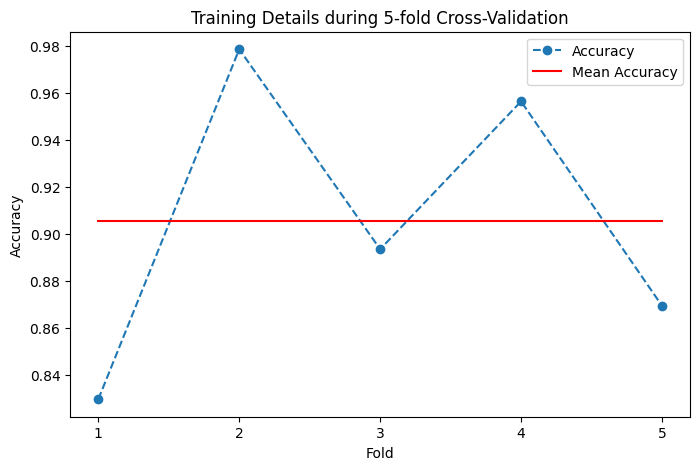

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Initialize the logistic regression classifier with a higher number of iterations
logreg_classifier = LogisticRegression(max_iter=2000)  # Increased max_iter

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_final_scaled = scaler.fit_transform(X_final)

# Model training with 5-fold cross-validation
cv_scores = cross_val_score(logreg_classifier, X_final_scaled, y, cv=5, scoring='accuracy')
cv_predictions = cross_val_predict(logreg_classifier, X_final_scaled, y, cv=5)

# Calculate mean cross-validation score
mean_cv_score = np.mean(cv_scores)

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", mean_cv_score)

# Plot training details
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='--', label='Accuracy')
plt.plot(range(1, 6), [mean_cv_score] * 5, color='r', linestyle='-', label='Mean Accuracy')
plt.xticks(range(1, 6))
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Training Details during 5-fold Cross-Validation')
plt.legend()
plt.show()


Accuracy: 0.8723404255319149
Precision: 0.9642857142857143
Recall: 0.84375
F1-score: 0.8999999999999999
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.93      0.82        15
           1       0.96      0.84      0.90        32

    accuracy                           0.87        47
   macro avg       0.85      0.89      0.86        47
weighted avg       0.89      0.87      0.88        47



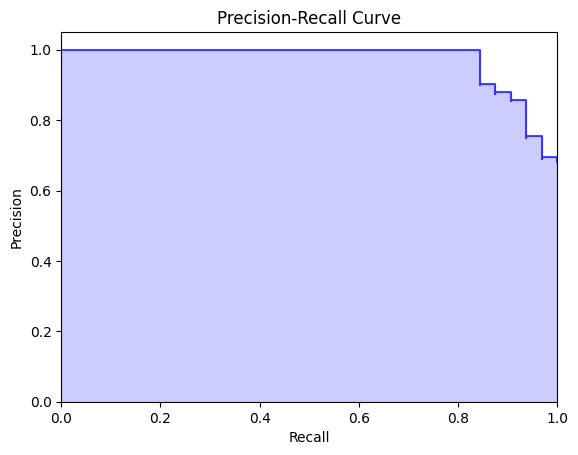

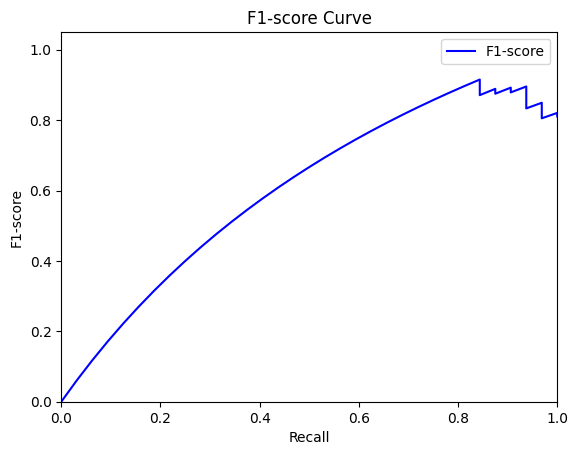

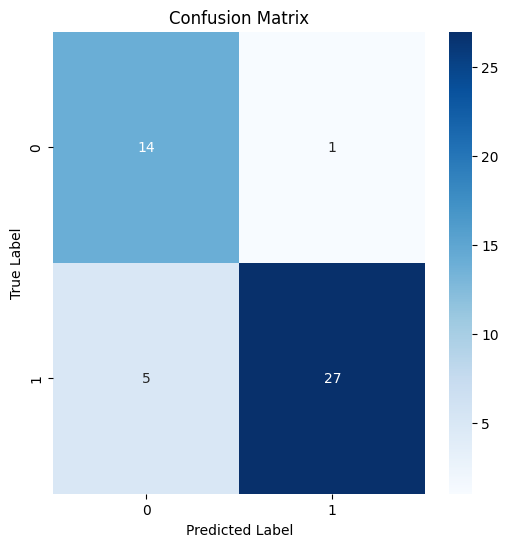

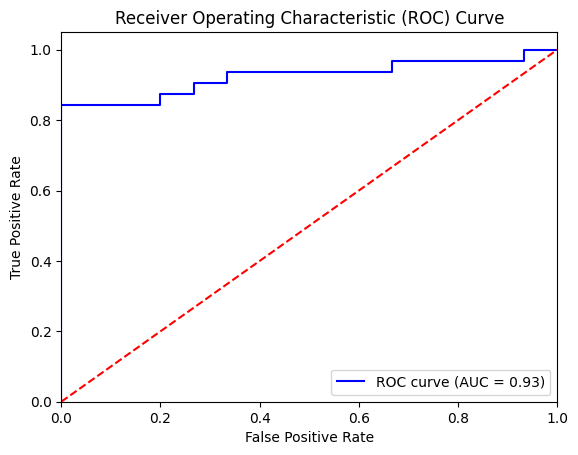

In [ ]:
# Initialize the logistic regression classifier
logreg_classifier = LogisticRegression(max_iter=2000)  # Increase max_iter

# Train the model
logreg_classifier.fit(X_train_scaled, y_train)


# Model testing and evaluation
y_pred = logreg_classifier.predict(X_test_scaled)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate and print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot Precision-Recall curve
y_pred_probs = logreg_classifier.predict_proba(X_test_scaled)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)

plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()


# Plot F1-score curve
f1_values = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
y_pred_probs = logreg_classifier.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# No need to scale the data for Naive Bayes

# Initialize the Multinomial Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()

# Train the model
naive_bayes_classifier.fit(X_train, y_train)


MultinomialNB()

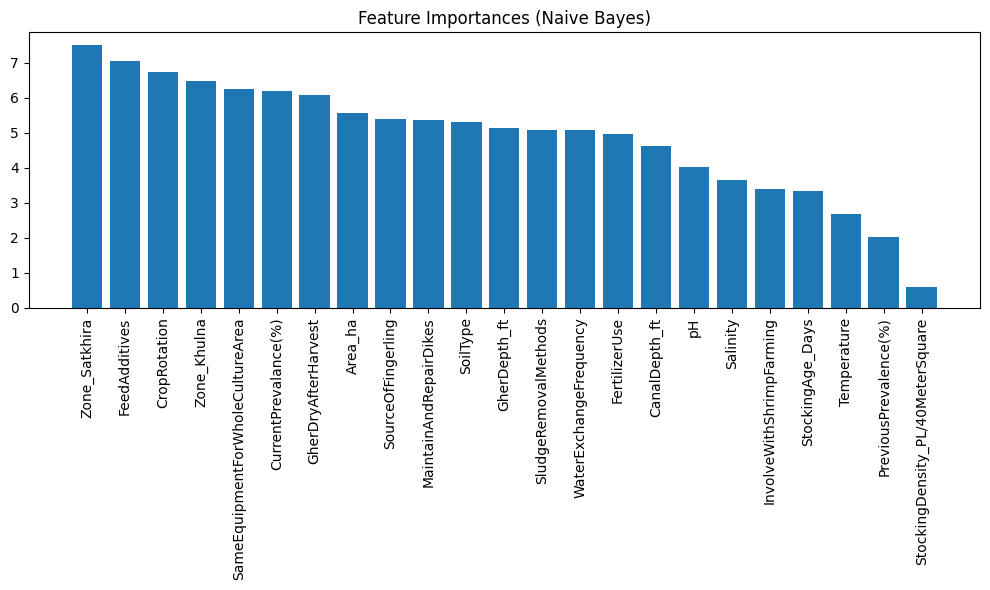

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already trained and fitted the Naive Bayes model (naive_bayes_classifier) on your data

# Get the feature log probabilities for each class
feature_log_prob = naive_bayes_classifier.feature_log_prob_

# Calculate the absolute mean of log probabilities across classes
feature_importance = np.mean(np.abs(feature_log_prob), axis=0)

# Assuming you have already defined feature_names based on your dataset
# Make sure feature_names has the same number of elements as features in your dataset
# feature_names = ...

# Sort feature importances in descending order
indices = np.argsort(feature_importance)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Naive Bayes)")
plt.bar(range(len(feature_names)), feature_importance[indices], align="center")
plt.xticks(range(len(feature_names)), np.array(feature_names)[indices], rotation=90)
plt.tight_layout()
plt.show()


Cross-Validation Scores: [1.         1.         0.95744681 1.         0.93478261]
Mean Cross-Validation Score: 0.978445883441258


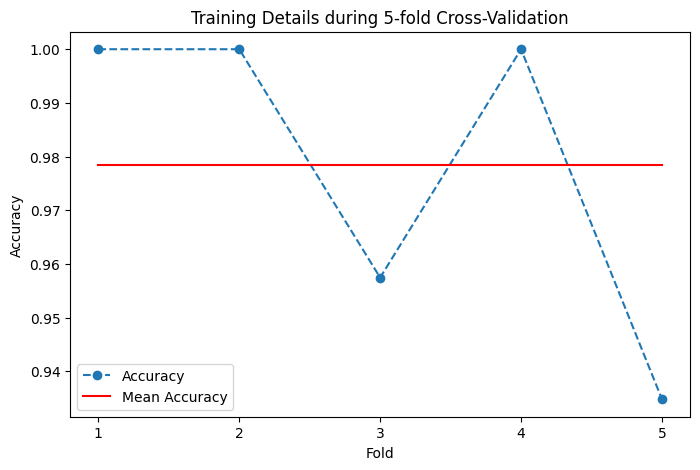

In [ ]:
# Initialize the Multinomial Naive Bayes classifier
mnb_classifier = MultinomialNB()

# Model training with 5-fold cross-validation
cv_scores = cross_val_score(mnb_classifier, X_final, y, cv=5, scoring='accuracy')
cv_predictions = cross_val_predict(mnb_classifier, X_final, y, cv=5)

# Calculate mean cross-validation score
mean_cv_score = np.mean(cv_scores)

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", mean_cv_score)

# Plot training details
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='--', label='Accuracy')
plt.plot(range(1, 6), [mean_cv_score] * 5, color='r', linestyle='-', label='Mean Accuracy')
plt.xticks(range(1, 6))
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Training Details during 5-fold Cross-Validation')
plt.legend()
plt.show()

Accuracy: 0.9787234042553191
Precision: 0.9800531914893617
Recall: 0.9787234042553191
F1-score: 0.9788977132834374
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.97      0.98        32

    accuracy                           0.98        47
   macro avg       0.97      0.98      0.98        47
weighted avg       0.98      0.98      0.98        47



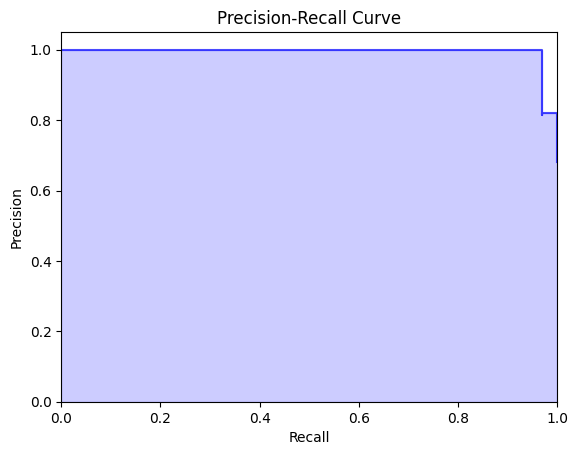

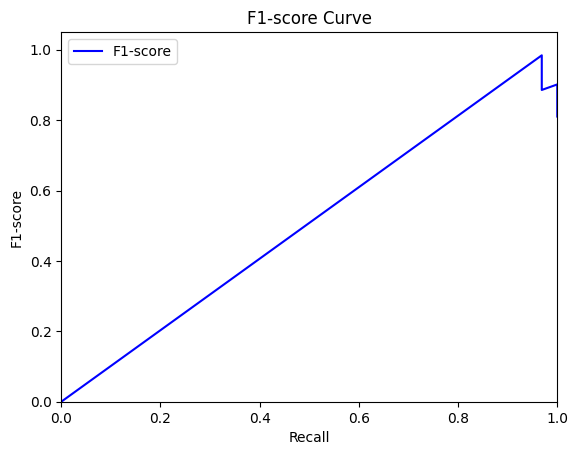

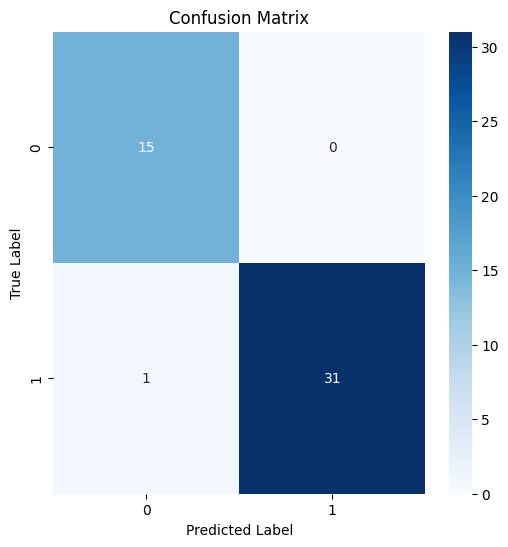

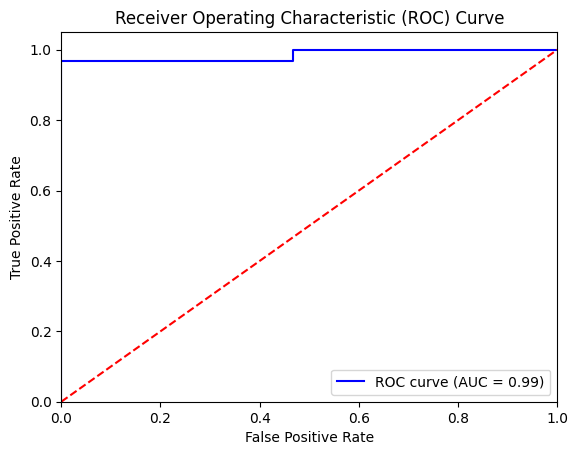

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming X_train and y_train are your training data and labels
# Train the MultinomialNB classifier
mnb_classifier = MultinomialNB()
mnb_classifier.fit(X_train, y_train)

# Model testing and evaluation
y_pred = mnb_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate and print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot Precision-Recall curve
y_pred_probs = mnb_classifier.predict_proba(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs[:, 1])

plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Plot F1-score curve
f1_values = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
y_pred_probs = mnb_classifier.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


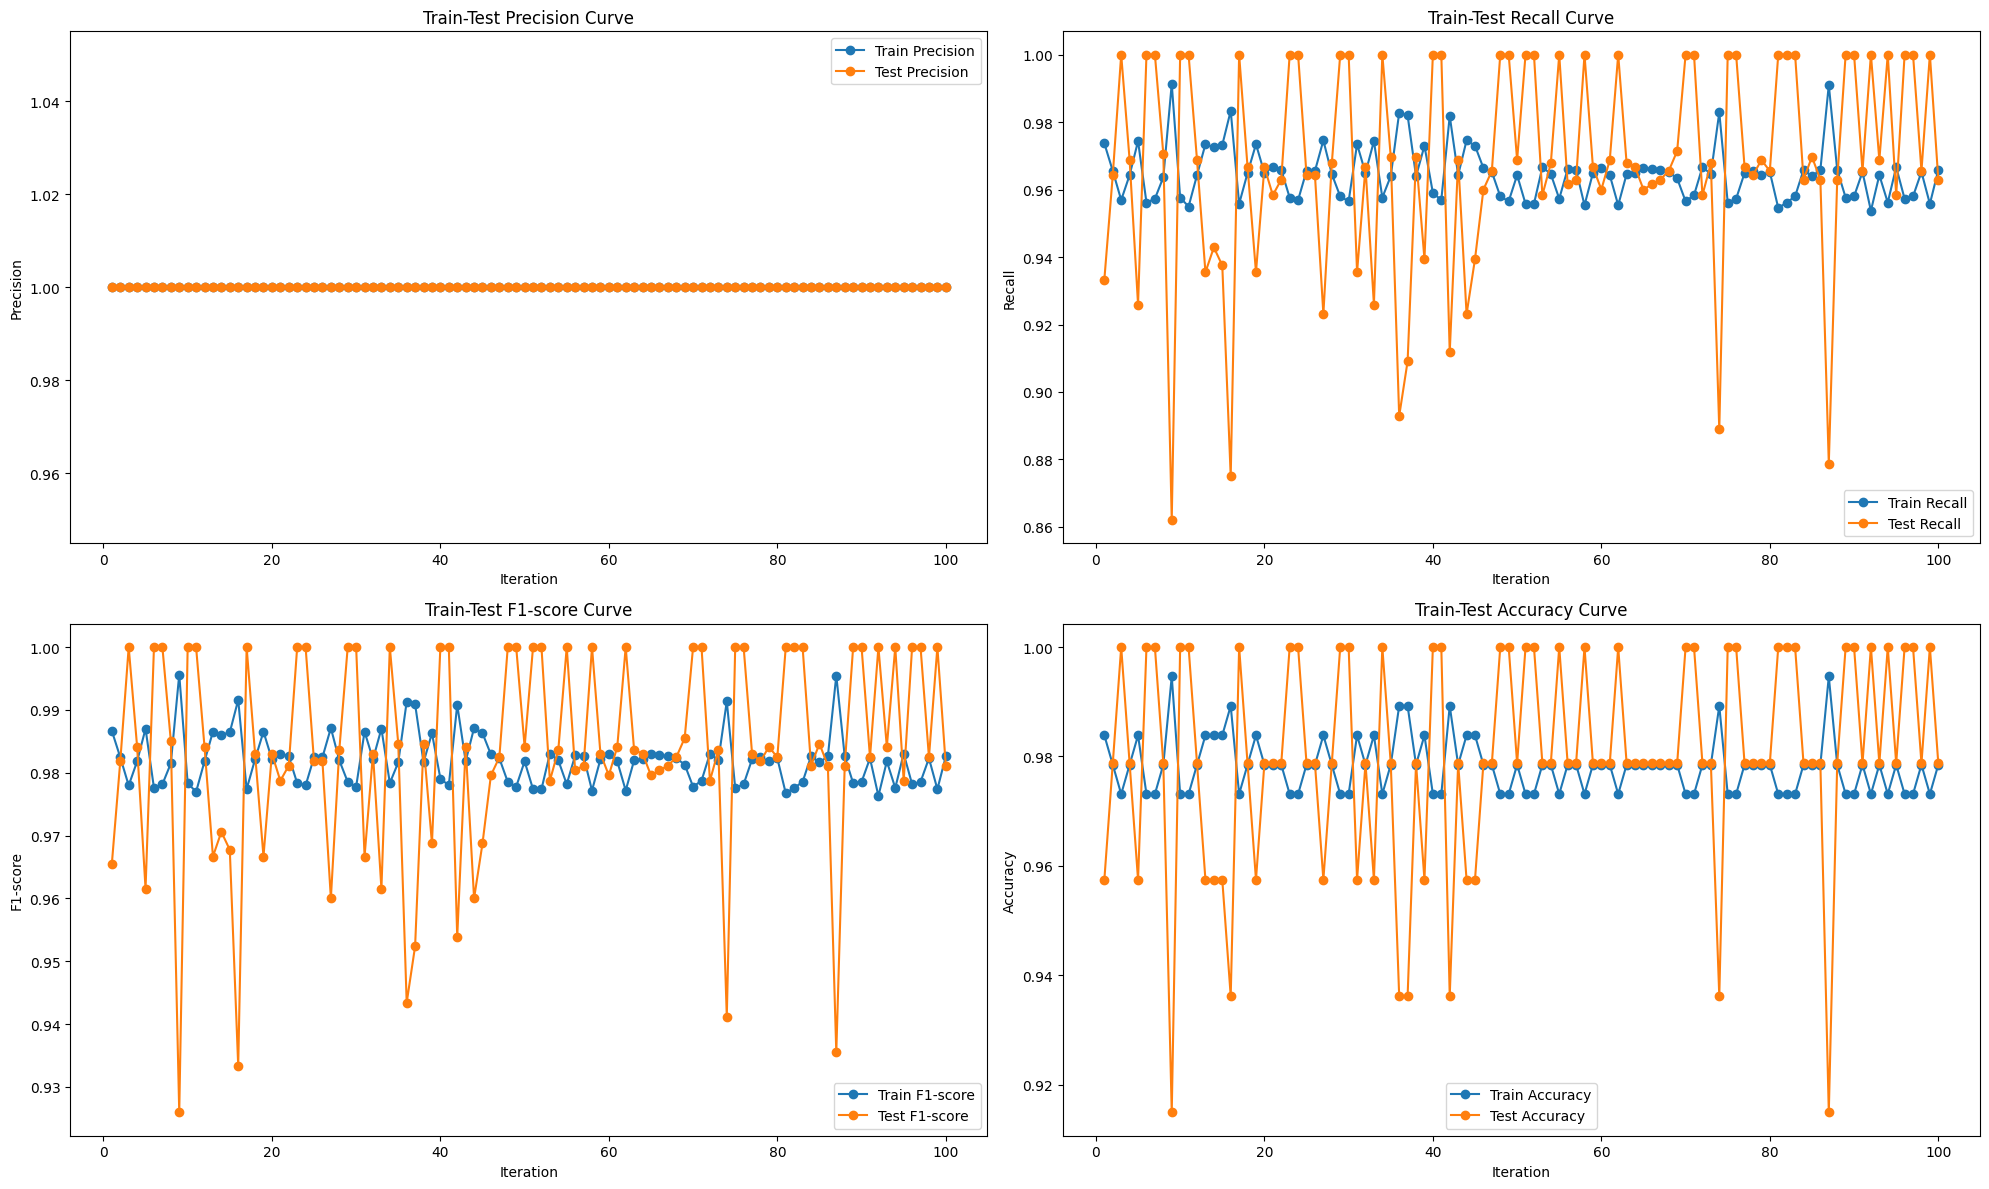

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Initialize lists to store train and test scores for each iteration
train_precision, test_precision = [], []
train_recall, test_recall = [], []
train_f1, test_f1 = [], []
train_accuracy, test_accuracy = [], []

# Number of iterations for train-test splits
num_iterations = 100

for i in range(num_iterations):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=i)

    # Step 3: Model training
    nb_classifier = MultinomialNB()
    nb_classifier.fit(X_train, y_train)

    # Step 4: Model evaluation on train and test sets
    y_train_pred = nb_classifier.predict(X_train)
    y_test_pred = nb_classifier.predict(X_test)

    # Calculate precision, recall, F1-score, and accuracy for train and test sets
    train_precision.append(precision_score(y_train, y_train_pred))
    test_precision.append(precision_score(y_test, y_test_pred))

    train_recall.append(recall_score(y_train, y_train_pred))
    test_recall.append(recall_score(y_test, y_test_pred))

    train_f1.append(f1_score(y_train, y_train_pred))
    test_f1.append(f1_score(y_test, y_test_pred))

    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

# Step 5: Plot train-test curves
iterations = np.arange(1, num_iterations + 1)

plt.figure(figsize=(20, 12))

# Precision curve
plt.subplot(2, 2, 1)
plt.plot(iterations, train_precision, marker='o', label='Train Precision')
plt.plot(iterations, test_precision, marker='o', label='Test Precision')
plt.xlabel('Iteration')
plt.ylabel('Precision')
plt.title('Train-Test Precision Curve')
plt.legend()

# Recall curve
plt.subplot(2, 2, 2)
plt.plot(iterations, train_recall, marker='o', label='Train Recall')
plt.plot(iterations, test_recall, marker='o', label='Test Recall')
plt.xlabel('Iteration')
plt.ylabel('Recall')
plt.title('Train-Test Recall Curve')
plt.legend()

# F1-score curve
plt.subplot(2, 2, 3)
plt.plot(iterations, train_f1, marker='o', label='Train F1-score')
plt.plot(iterations, test_f1, marker='o', label='Test F1-score')
plt.xlabel('Iteration')
plt.ylabel('F1-score')
plt.title('Train-Test F1-score Curve')
plt.legend()

# Accuracy curve
plt.subplot(2, 2, 4)
plt.plot(iterations, train_accuracy, marker='o', label='Train Accuracy')
plt.plot(iterations, test_accuracy, marker='o', label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Train-Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Initialize the gradient boosting classifier
gb_classifier = GradientBoostingClassifier()

# Train the model
gb_classifier.fit(X_train, y_train)



GradientBoostingClassifier()

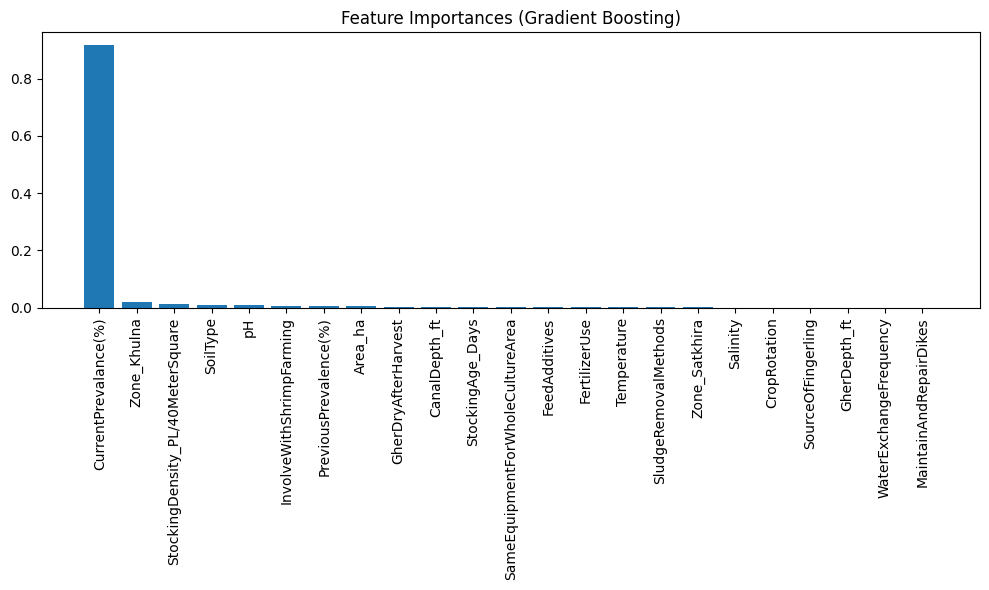

In [ ]:
# Calculate feature importance
importances = gb_classifier.feature_importances_
feature_names = X_train.columns

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Gradient Boosting)")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

Cross-Validation Scores: [0.9787234  1.         0.95744681 0.95652174 0.89130435]
Mean Cross-Validation Score: 0.9567992599444958


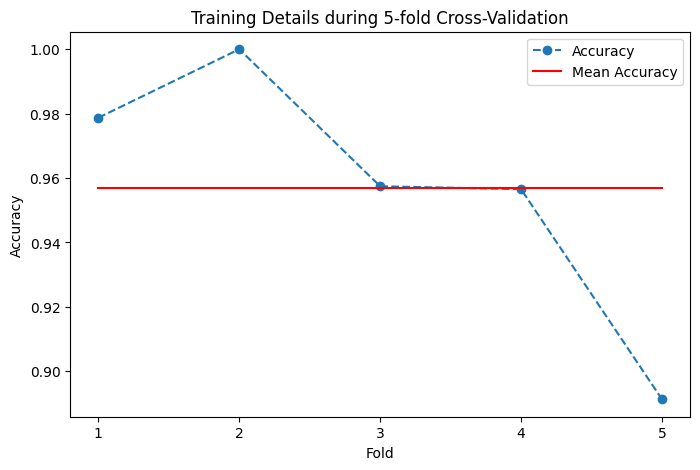

In [ ]:
# Model training with 5-fold cross-validation
cv_scores = cross_val_score(gb_classifier, X_final, y, cv=5, scoring='accuracy')
cv_predictions = cross_val_predict(gb_classifier, X_final, y, cv=5)

# Calculate mean cross-validation score
mean_cv_score = np.mean(cv_scores)

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", mean_cv_score)

# Plot training details
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='--', label='Accuracy')
plt.plot(range(1, 6), [mean_cv_score] * 5, color='r', linestyle='-', label='Mean Accuracy')
plt.xticks(range(1, 6))
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Training Details during 5-fold Cross-Validation')
plt.legend()
plt.show()




Accuracy: 0.9787234042553191
Precision: 1.0
Recall: 0.96875
F1-score: 0.9841269841269841
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.97      0.98        32

    accuracy                           0.98        47
   macro avg       0.97      0.98      0.98        47
weighted avg       0.98      0.98      0.98        47



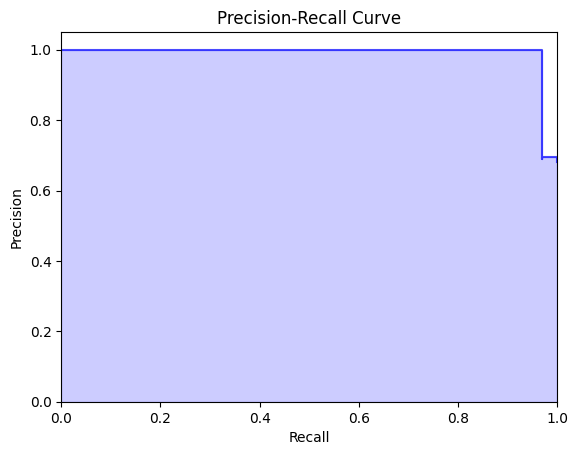

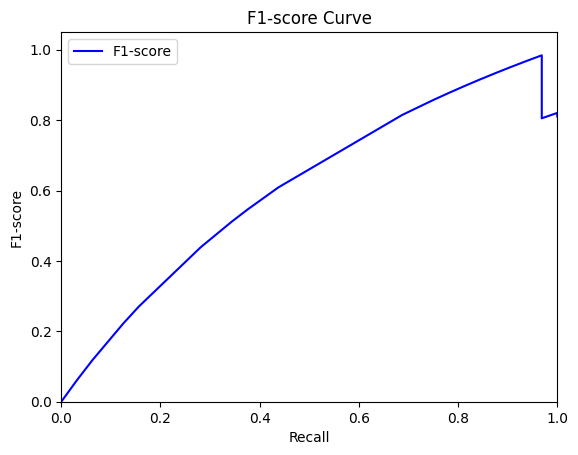

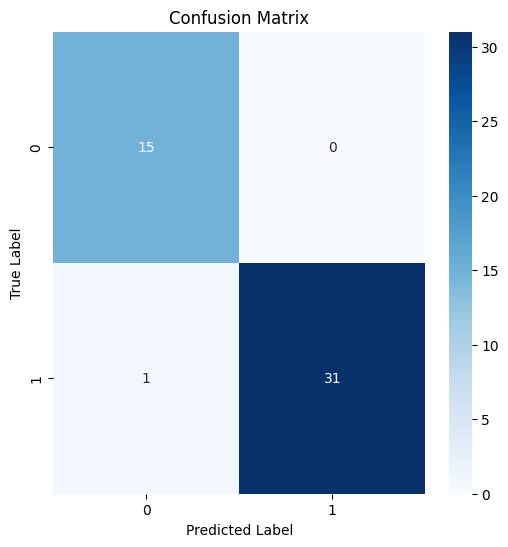

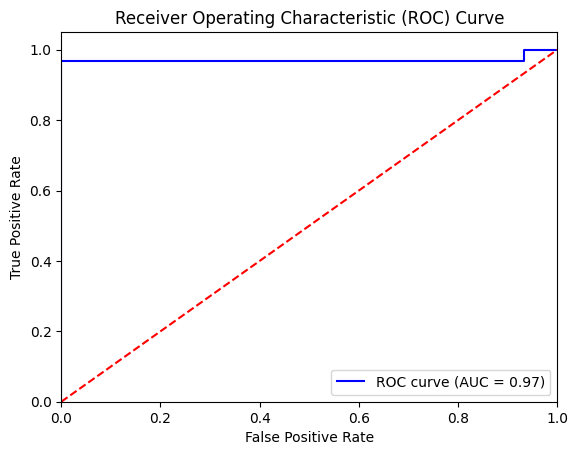

In [ ]:
# Model testing and evaluation
y_pred = gb_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate and print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot Precision-Recall curve
y_pred_probs = gb_classifier.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)

plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Plot F1-score curve
f1_values = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
y_pred_probs = gb_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Initialize the k-NN classifier
knn_classifier = KNeighborsClassifier()

# Train the model
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier()

<ipython-input-31-77a20187934d>:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train[feature_name][y_train == 0], label="Class 0", shade=True)
<ipython-input-31-77a20187934d>:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train[feature_name][y_train == 1], label="Class 1", shade=True)


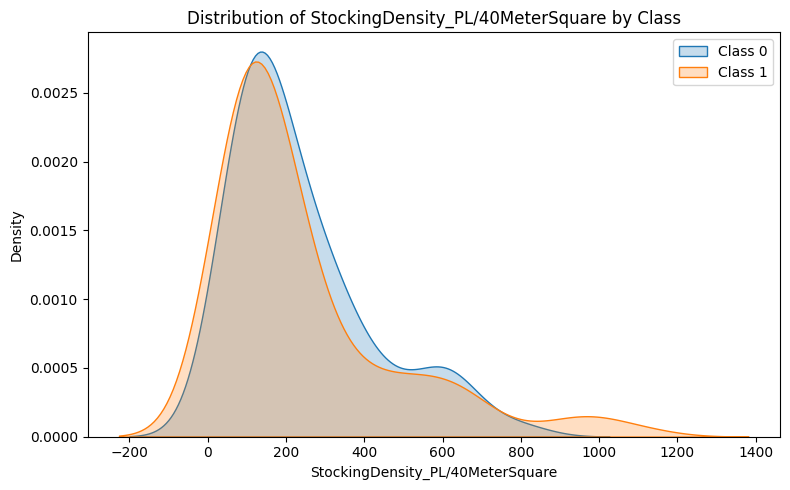

<ipython-input-31-77a20187934d>:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train[feature_name][y_train == 0], label="Class 0", shade=True)
<ipython-input-31-77a20187934d>:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train[feature_name][y_train == 1], label="Class 1", shade=True)


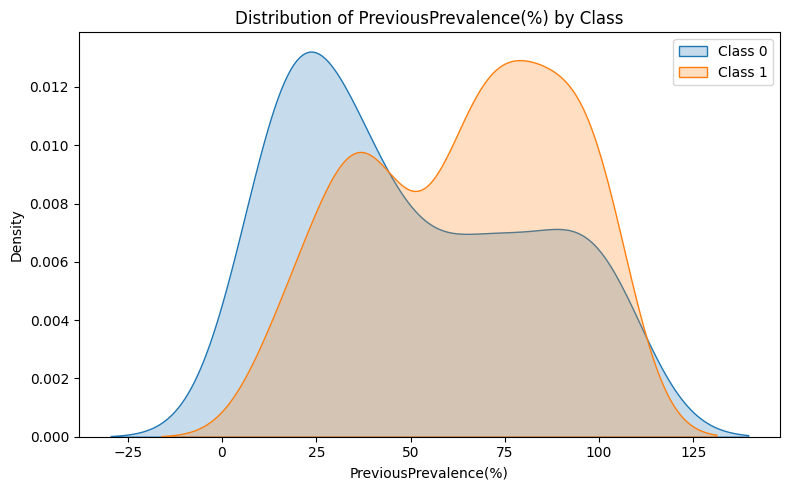

<ipython-input-31-77a20187934d>:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train[feature_name][y_train == 0], label="Class 0", shade=True)
<ipython-input-31-77a20187934d>:18: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(X_train[feature_name][y_train == 0], label="Class 0", shade=True)
<ipython-input-31-77a20187934d>:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train[feature_name][y_train == 1], label="Class 1", shade=True)


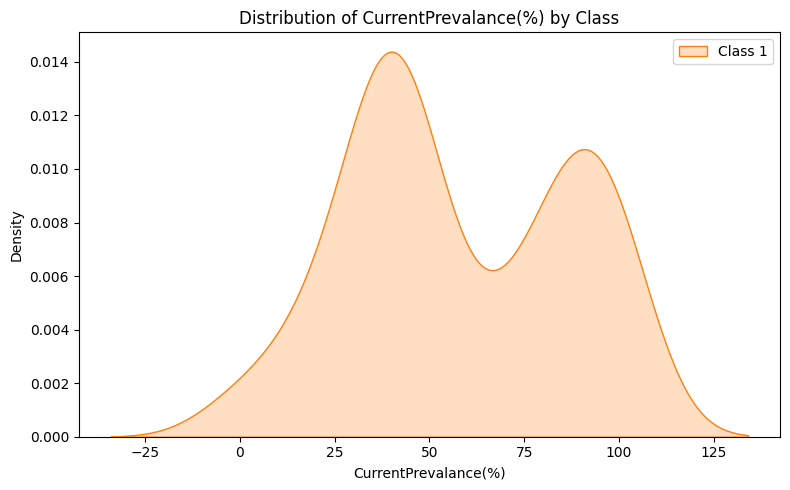

<ipython-input-31-77a20187934d>:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train[feature_name][y_train == 0], label="Class 0", shade=True)
<ipython-input-31-77a20187934d>:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train[feature_name][y_train == 1], label="Class 1", shade=True)


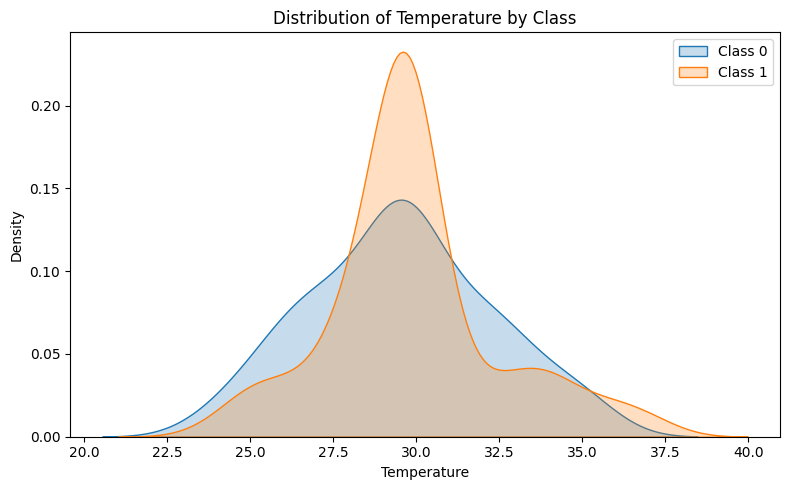

<ipython-input-31-77a20187934d>:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train[feature_name][y_train == 0], label="Class 0", shade=True)
<ipython-input-31-77a20187934d>:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train[feature_name][y_train == 1], label="Class 1", shade=True)


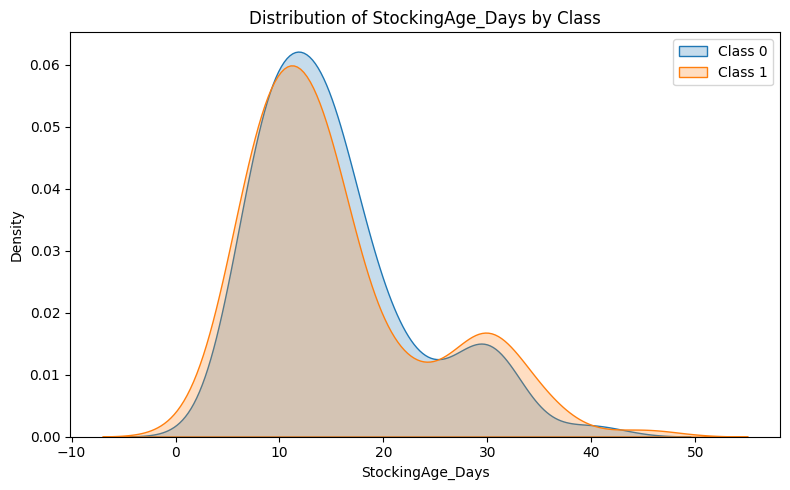

In [ ]:
# Initialize the k-NN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Choose the number of features you want to visualize (e.g., top 5)
num_features = 5

# Get indices of the most important features
important_feature_indices = np.argsort(np.sum(X_train, axis=0))[::-1][:num_features]

# Get the corresponding feature names
important_feature_names = X_train.columns[important_feature_indices]

# Plot distribution plots for each important feature based on class labels
for feature_name in important_feature_names:
    plt.figure(figsize=(8, 5))
    plt.title(f"Distribution of {feature_name} by Class")
    sns.kdeplot(X_train[feature_name][y_train == 0], label="Class 0", shade=True)
    sns.kdeplot(X_train[feature_name][y_train == 1], label="Class 1", shade=True)
    plt.legend()
    plt.xlabel(feature_name)
    plt.ylabel("Density")
    plt.tight_layout()
    plt.show()





Cross-Validation Scores: [0.89361702 0.87234043 0.80851064 0.93478261 0.86956522]
Mean Cross-Validation Score: 0.875763182238668


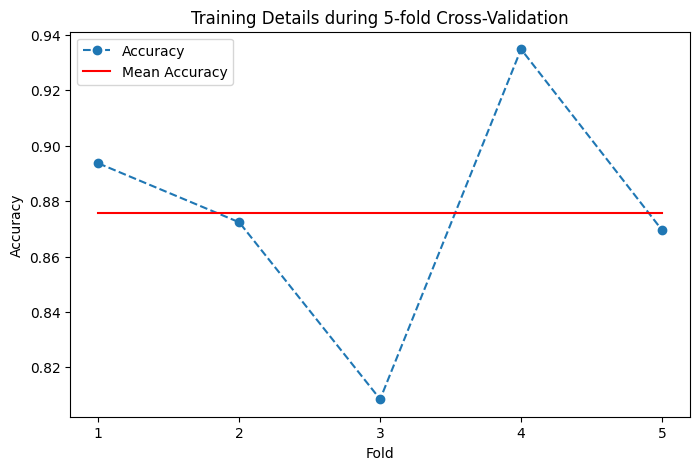

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

# Initialize the k-NN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # Set n_neighbors as desired

# Model training with 5-fold cross-validation
cv_scores = cross_val_score(knn_classifier, X_final, y, cv=5, scoring='accuracy')
cv_predictions = cross_val_predict(knn_classifier, X_final, y, cv=5)

# Calculate mean cross-validation score
mean_cv_score = np.mean(cv_scores)

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", mean_cv_score)

# Plot training details
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='--', label='Accuracy')
plt.plot(range(1, 6), [mean_cv_score] * 5, color='r', linestyle='-', label='Mean Accuracy')
plt.xticks(range(1, 6))
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Training Details during 5-fold Cross-Validation')
plt.legend()
plt.show()


Accuracy: 0.7446808510638298
Precision: 0.8571428571428571
Recall: 0.75
F1-score: 0.7999999999999999
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.73      0.65        15
           1       0.86      0.75      0.80        32

    accuracy                           0.74        47
   macro avg       0.72      0.74      0.72        47
weighted avg       0.77      0.74      0.75        47



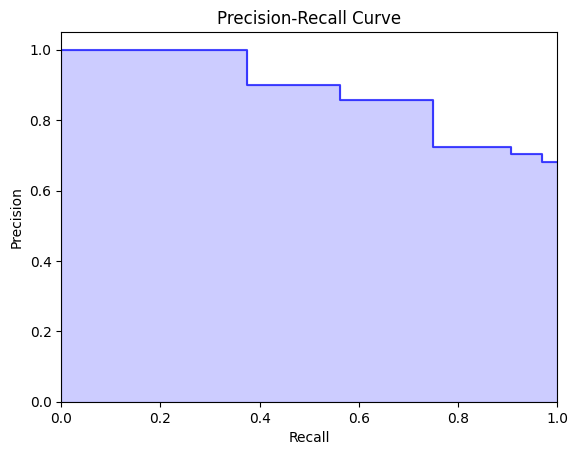

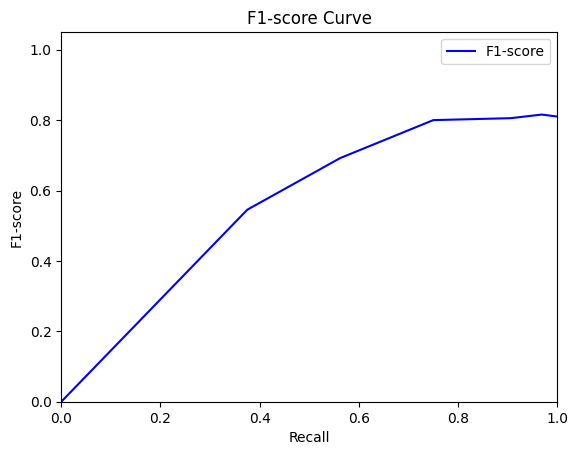

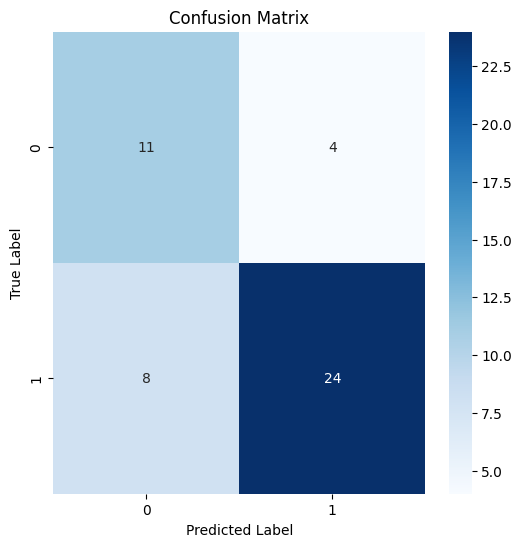

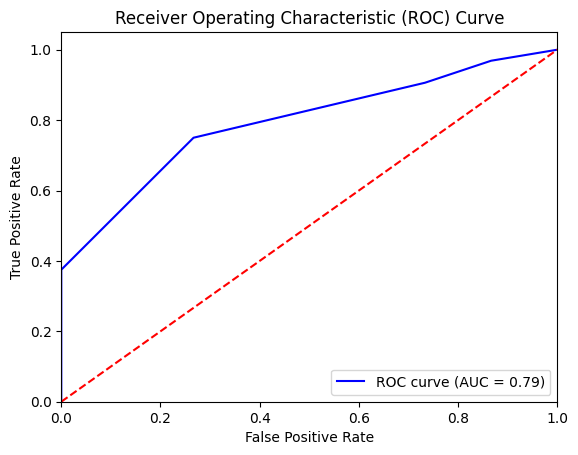

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import precision_recall_curve, auc, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the k-NN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # Set n_neighbors as desired

# Train the model
knn_classifier.fit(X_train_scaled, y_train)


# Model testing and evaluation
y_pred = knn_classifier.predict(X_test_scaled)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate and print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot Precision-Recall curve
y_pred_probs = knn_classifier.predict_proba(X_test_scaled)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)

plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Plot F1-score curve
f1_values = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
y_pred_probs = knn_classifier.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()